# O que é Clustering?
Clustering, ou agrupamento, é uma técnica de aprendizado de máquina não supervisionado que visa agrupar um conjunto de objetos em grupos (clusters) de tal forma que os objetos dentro de cada grupo sejam mais semelhantes entre si do que aqueles em grupos diferentes. Essa técnica é amplamente utilizada em diversas áreas para análise exploratória de dados, permitindo identificar padrões e estruturas subjacentes nos dados.

---

# Principais Algoritmos de Clustering

## 1. K-means
- **Descrição**: K-means é um dos algoritmos de clustering mais populares. Ele funciona atribuindo dados a um número pré-definido de clusters (k). O algoritmo iterativamente calcula os centróides de cada cluster e atualiza as atribuições de cluster até que as mudanças sejam mínimas.
- **Vantagens**:
  - Simplicidade e rapidez na execução.
  - Fácil de entender e implementar.
- **Desvantagens**:
  - Necessidade de especificar o número de clusters (k) antecipadamente.
  - Sensível a outliers e pontos de dados iniciais.

## 2. Hierarchical Clustering
- **Descrição**: Este algoritmo constrói uma hierarquia de clusters, utilizando uma abordagem aglomerativa (de baixo para cima) ou divisiva (de cima para baixo). O resultado é frequentemente visualizado em um dendrograma, que mostra as relações entre os clusters.
- **Vantagens**:
  - Não requer especificação do número de clusters previamente.
  - Produz uma estrutura de árvore que pode ser interpretada.
- **Desvantagens**:
  - Pode ser computacionalmente intensivo para grandes conjuntos de dados.
  - Uma vez que a decisão de agrupamento é feita, não pode ser alterada.

## 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- **Descrição**: DBSCAN identifica clusters de pontos densamente agrupados e separa pontos em regiões com baixa densidade como ruído. Ele não requer a definição do número de clusters previamente e é eficaz em conjuntos de dados com formas de clusters não esféricas.
- **Vantagens**:
  - Pode encontrar clusters de formas arbitrárias.
  - Identifica outliers como pontos de ruído.
- **Desvantagens**:
  - A eficácia depende dos parâmetros de densidade (raio e número mínimo de pontos).
  - Não funciona bem com conjuntos de dados de alta dimensão.

---

# Aplicações Práticas de Clustering

1. **Segmentação de Clientes**
   - O clustering é amplamente utilizado em marketing para segmentar clientes com base em comportamentos de compra, características demográficas e preferências. Isso permite que as empresas personalizem suas estratégias de marketing e produtos para atender melhor a cada grupo de clientes.

2. **Compressão de Imagem**
   - Na compressão de imagem, técnicas de clustering, como K-means, são usadas para reduzir a quantidade de cores em uma imagem. Os pixels semelhantes são agrupados, permitindo que a imagem seja representada por um número menor de cores, resultando em tamanhos de arquivo menores.

3. **Agrupamento de Dados Sem Rótulos**
   - Clustering é útil em contextos onde os dados não têm rótulos, como em análise de dados exploratória. Isso pode incluir o agrupamento de documentos similares em sistemas de recuperação de informação, identificação de padrões em dados de sensores, ou agrupamento de genes em biologia.

---

# Conclusão
O clustering é uma técnica poderosa para a análise exploratória de dados, permitindo identificar e compreender padrões em conjuntos de dados complexos. A escolha do algoritmo adequado depende do tipo de dados e do problema específico que se deseja resolver. As aplicações práticas do clustering são vastas, abrangendo desde marketing até ciência de dados e processamento de imagens.


# Exemplo de Analise e Clustering
### Dataset Escolhido:
Credit Card Costumer Data: Esse dataset reúne dados de usuários de cartão de credito, apresentando dados como limite de crédito, número de cartões e o número de visitas ao banco, presenciais, por ligação, online.

## Importando as Bilbliotecas necessárias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Importação do dataset:

In [ ]:
df = pd.read_csv('/content/dataset/Credit Card Customer Data.csv')

## Eliminando dados irrelevantes e exibindo as pontas do dataset
As colunas de "Sl_No" e "Customer Key" são irrelevantes para a análise pois apresentam valores não relacionados aos demais e são individuais a cada cliente

In [ ]:
df = df.drop(columns=["Sl_No", "Customer Key"])

In [ ]:
df.head(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df.tail(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0
659,167000,9,0,12,2


##Graficos cruzados entre cada coluna do dataset

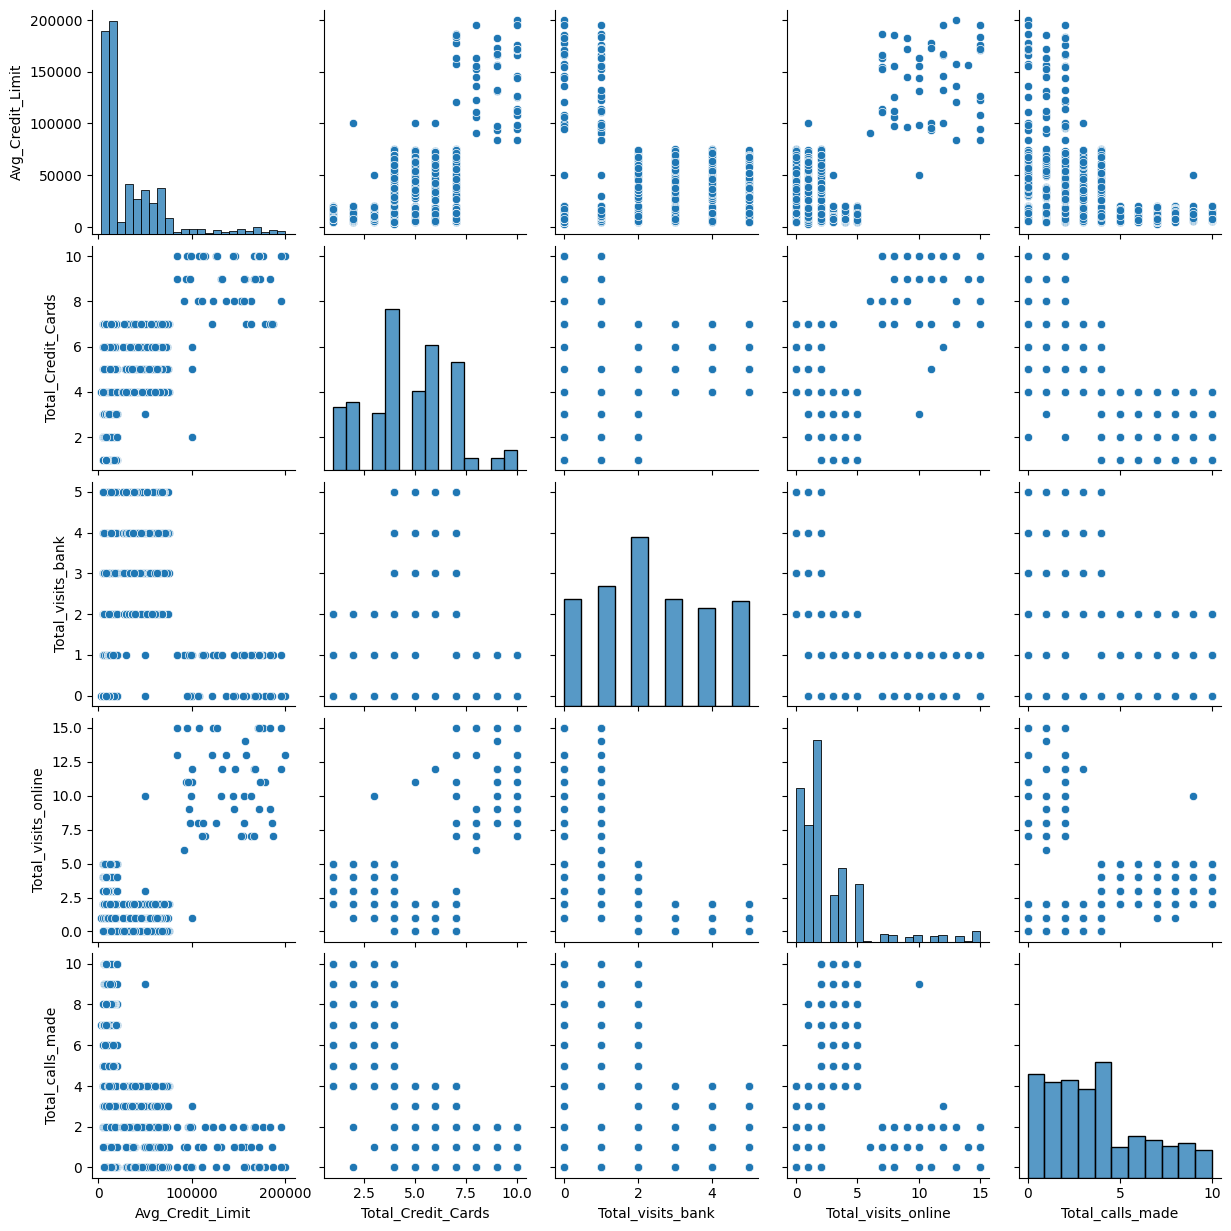

In [ ]:
sns.pairplot(df)

## Usando o método Elbow
Utilizamos o método Elbow para, através da análise de inércia, aproximar de um número ideal de clusters para a análise. Nesse caso, usaremos 3 clusters

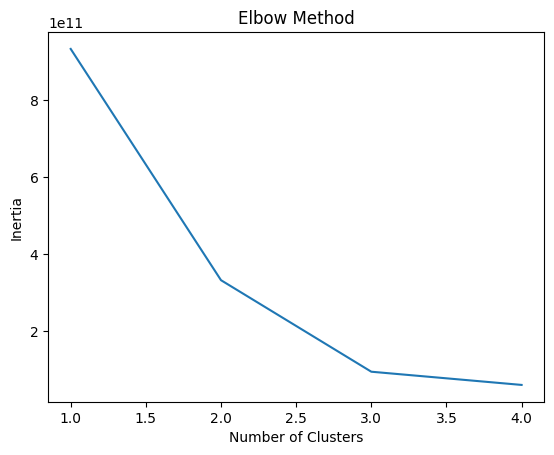

In [ ]:
inertia = []
for n in range(1, 5):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 5), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Avg_Credit_Limit', 'Total_Credit_Cards']])
print(scaled_data[:5])

[[ 1.74018685 -1.24922476]
 [ 0.41029254 -0.78758515]
 [ 0.41029254  1.05897329]
 [-0.12166518  0.13569407]
 [ 1.74018685  0.59733368]]


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Cluster                                                            
0            37160.606061            5.787879           3.424242   
1           142750.000000            8.875000           0.625000   
2            13134.751773            2.730496           1.510638   

         Total_visits_online  Total_calls_made  
Cluster                                         
0                   1.057576          2.042424  
1                  10.875000          1.020833  
2                   3.010638          5.822695  


# Representações Gráficas dos Clusters

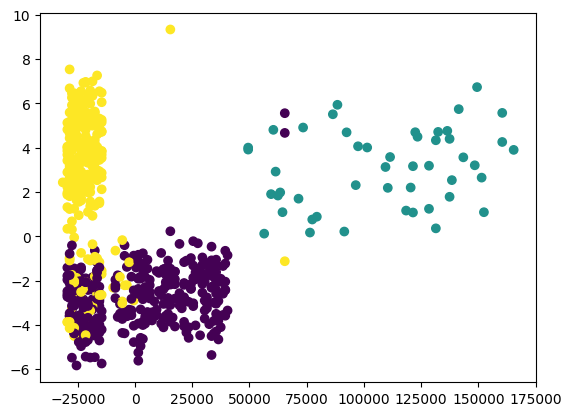

In [ ]:
pca = PCA(2)
pca_data = pca.fit_transform(df)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'])
plt.show()


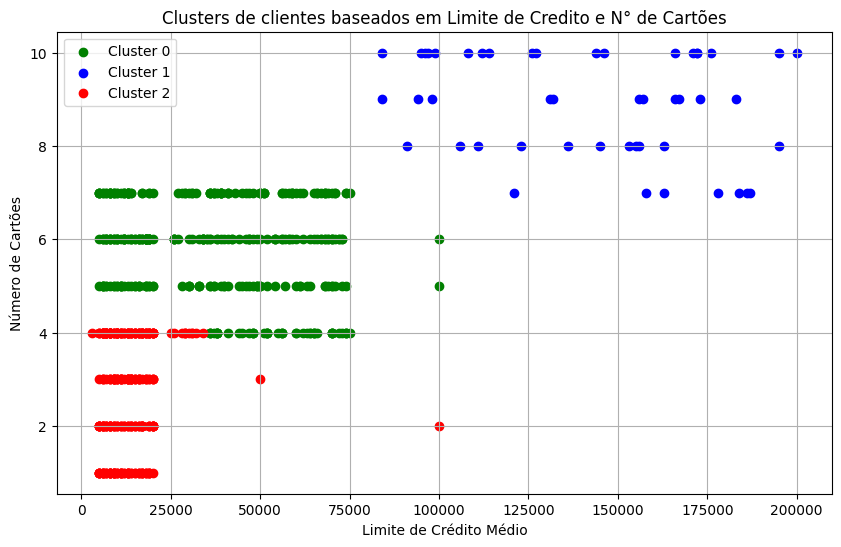

In [ ]:
plt.figure(figsize=(10, 6))


plt.scatter(df[df['Cluster'] == 0]['Avg_Credit_Limit'],
            df[df['Cluster'] == 0]['Total_Credit_Cards'],
            color='green', label='Cluster 0')

plt.scatter(df[df['Cluster'] == 1]['Avg_Credit_Limit'],
            df[df['Cluster'] == 1]['Total_Credit_Cards'],
            color='blue', label='Cluster 1')

plt.scatter(df[df['Cluster'] == 2]['Avg_Credit_Limit'],
            df[df['Cluster'] == 2]['Total_Credit_Cards'],
            color='red', label='Cluster 2')

plt.xlabel('Limite de Crédito Médio')
plt.ylabel('Número de Cartões')
plt.title('Clusters de clientes baseados em Limite de Credito e N° de Cartões')


plt.legend()


plt.grid(True)
plt.show()


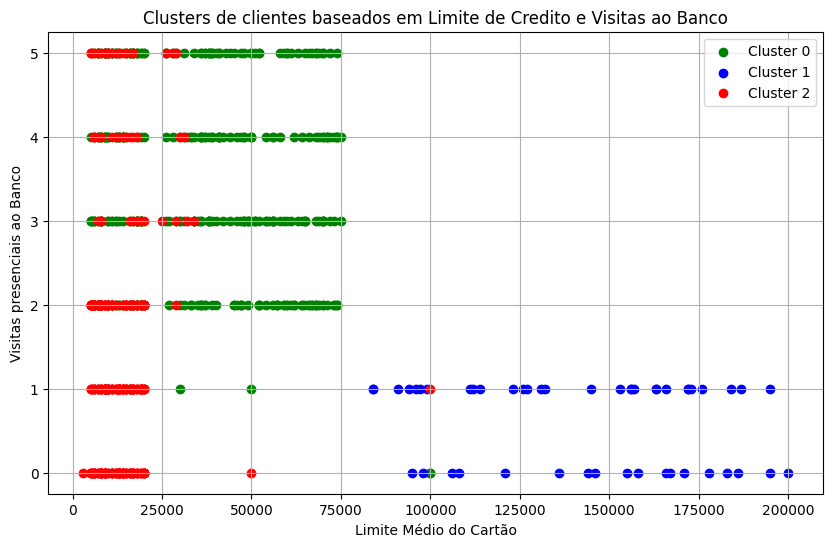

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df[df['Cluster'] == 0]['Avg_Credit_Limit'],
            df[df['Cluster'] == 0]['Total_visits_bank'],
            color='green', label='Cluster 0')

plt.scatter(df[df['Cluster'] == 1]['Avg_Credit_Limit'],
            df[df['Cluster'] == 1]['Total_visits_bank'],
            color='blue', label='Cluster 1')

plt.scatter(df[df['Cluster'] == 2]['Avg_Credit_Limit'],
            df[df['Cluster'] == 2]['Total_visits_bank'],
            color='red', label='Cluster 2')


plt.xlabel('Limite Médio do Cartão')
plt.ylabel('Visitas presenciais ao Banco')
plt.title('Clusters de clientes baseados em Limite de Credito e Visitas ao Banco')


plt.legend()


plt.grid(True)
plt.show()

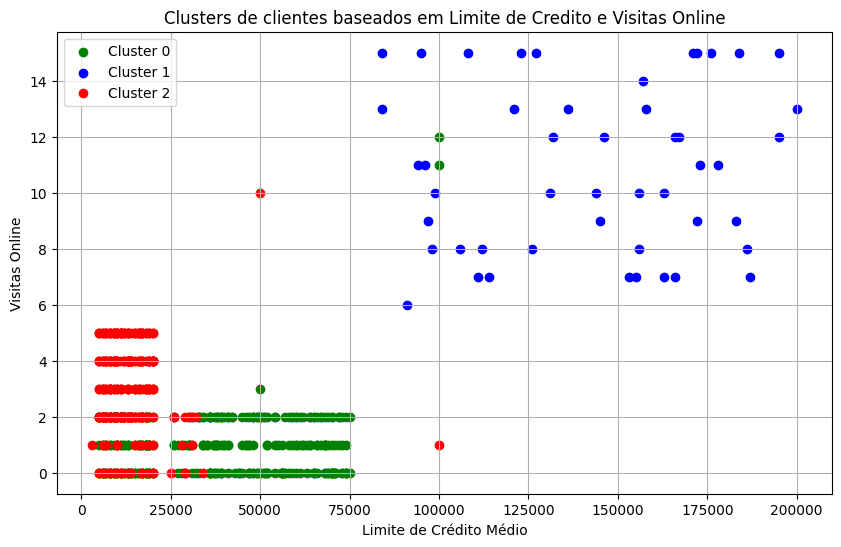

In [50]:
plt.figure(figsize=(10, 6))


plt.scatter(df[df['Cluster'] == 0]['Avg_Credit_Limit'],
            df[df['Cluster'] == 0]['Total_visits_online'],
            color='green', label='Cluster 0')

plt.scatter(df[df['Cluster'] == 1]['Avg_Credit_Limit'],
            df[df['Cluster'] == 1]['Total_visits_online'],
            color='blue', label='Cluster 1')

plt.scatter(df[df['Cluster'] == 2]['Avg_Credit_Limit'],
            df[df['Cluster'] == 2]['Total_visits_online'],
            color='red', label='Cluster 2')

plt.xlabel('Limite de Crédito Médio')
plt.ylabel('Visitas Online')
plt.title('Clusters de clientes baseados em Limite de Credito e Visitas Online')


plt.legend()


plt.grid(True)
plt.show()


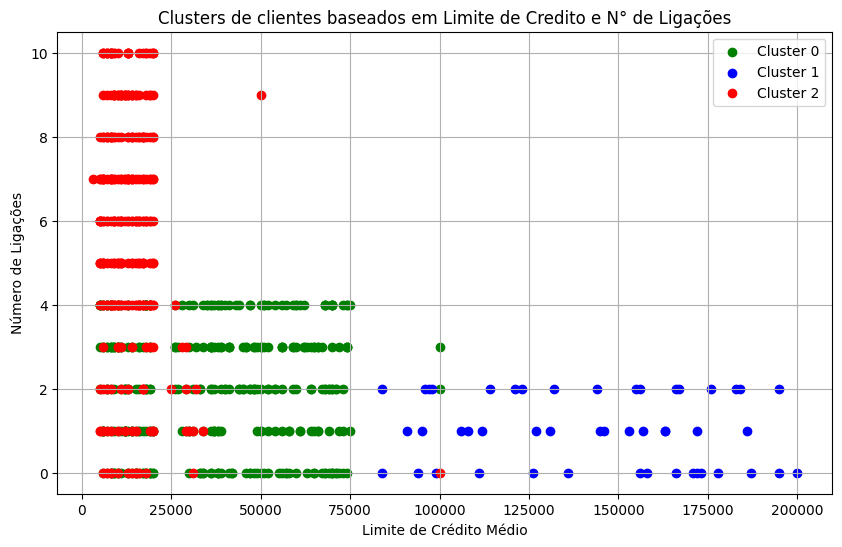

In [49]:
plt.figure(figsize=(10, 6))


plt.scatter(df[df['Cluster'] == 0]['Avg_Credit_Limit'],
            df[df['Cluster'] == 0]['Total_calls_made'],
            color='green', label='Cluster 0')

plt.scatter(df[df['Cluster'] == 1]['Avg_Credit_Limit'],
            df[df['Cluster'] == 1]['Total_calls_made'],
            color='blue', label='Cluster 1')

plt.scatter(df[df['Cluster'] == 2]['Avg_Credit_Limit'],
            df[df['Cluster'] == 2]['Total_calls_made'],
            color='red', label='Cluster 2')

plt.xlabel('Limite de Crédito Médio')
plt.ylabel('Número de Ligações')
plt.title('Clusters de clientes baseados em Limite de Credito e N° de Ligações')


plt.legend()


plt.grid(True)
plt.show()


# Análise dos Clusters e Metodologias de Clustering

## 1. Interpretação dos Clusters

### Cluster 0: Clientes Intermediários
- **Descrição**: Este grupo representa clientes com um limite de crédito médio e um valor líquido que estão entre os extremos.
- **Insights**:
  - Eles podem ser considerados clientes de risco moderado, que não estão nem muito próximos ao limite de crédito máximo, nem em uma situação de baixo patrimônio.
  - Estratégias de marketing podem incluir ofertas de cartões de crédito com limites mais altos ou produtos de investimento para aumentar seu valor líquido.

### Cluster 1: Clientes de Alto Patrimônio
- **Descrição**: Este cluster é composto por clientes que possuem um limite de crédito médio elevado e um patrimônio líquido considerável.
- **Insights**:
  - Esses clientes têm a tendência a dar prioridade para interações online, evitando visitas presenciais e por ligação
  - Esses clientes provavelmente têm hábitos de consumo mais robustos e podem estar mais abertos a ofertas de produtos financeiros, como investimentos, serviços de gestão de patrimônio ou cartões de crédito premium.
  - As instituições financeiras podem se concentrar em programas de fidelidade ou recompensas que atendam a esse grupo, visando aumentar o engajamento.

### Cluster 2: Clientes de Baixo Patrimônio
- **Descrição**: Este grupo inclui clientes com um limite de crédito médio baixo e um patrimônio líquido também reduzido.
- **Insights**:
  - Eles podem estar enfrentando dificuldades financeiras ou serem novos no sistema de crédito.
  - Estratégias como educação financeira, ofertas de cartões de crédito com limites baixos e incentivos para construir um histórico de crédito poderiam ser benéficas.
  - O acompanhamento e suporte proativo são importantes para evitar a inadimplência.

---

## 2. Alterar o Número de Clusters e Observar os Impactos

- **Teste de Diferentes Números de Clusters**: Você pode experimentar diferentes números de clusters (por exemplo, 2, 4 ou 5) e observar como a distribuição dos clientes muda.
- **Impactos Potenciais**:
  - Um número menor de clusters pode levar a uma perda de informações detalhadas, enquanto um número maior pode resultar em clusters muito pequenos e pouco significativos.
  - Visualizações gráficas, como o gráfico de dispersão para cada configuração, ajudam a entender melhor a separação entre os grupos.

```python
# Teste com um número diferente de clusters, por exemplo, 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['New_Cluster'] = kmeans.fit_predict(scaled_data)

# Visualização para o novo número de clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(df[df['New_Cluster'] == cluster]['Avg_Credit_Limit'],
                df[df['New_Cluster'] == cluster]['Total_calls_made'],
                label=f'Cluster {cluster}')
plt.xlabel('Limite de Crédito Médio')
plt.ylabel('Número de Ligações Feitas')
plt.title('Clusters de Clientes com 4 Grupos')
plt.legend()
plt.grid(True)
plt.show()


## 3. Tentar Outro Dataset do Kaggle

- **Escolha de Outro Dataset**: Procure por datasets no Kaggle relacionados ao comportamento do cliente, finanças pessoais, ou mesmo outros conjuntos de dados que contenham variáveis contínuas. Exemplos:
  - Dados sobre compras online.
  - Informações sobre clientes de serviços financeiros.
  - Dados de churn de clientes.

- **Exercitar Clustering**: Implemente a mesma metodologia (normalização, escolha de recursos, aplicação de KMeans) no novo conjunto de dados, ajustando conforme necessário.

---

## 4. Testar Outros Métodos de Clustering

- **DBSCAN**:
  - É um algoritmo baseado em densidade que identifica clusters de pontos densamente agrupados e é útil para lidar com outliers.
  - Pode ser implementado da seguinte forma:

```python
from sklearn.cluster import DBSCAN

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualização
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


- **Agglomerative Clustering**:
  - É um método hierárquico que pode ser usado para visualizar a estrutura dos clusters.
  - Você pode usar o `dendrogram` para entender melhor a separação entre os clusters.

```python
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Dendrogram
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(scaled_data)

# Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(model.children_)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()


### Benefícios de Diferentes Abordagens:
- **KMeans** é rápido e eficiente para grandes conjuntos de dados, mas assume que os clusters são esféricos e bem separados.
- **DBSCAN** é excelente para conjuntos de dados com formas arbitrárias e para lidar com outliers.
- **Agglomerative Clustering** fornece uma visão hierárquica dos dados, permitindo a escolha de clusters em diferentes níveis.

---

## Conclusão
A combinação de diferentes técnicas de clustering e a análise de múltiplos conjuntos de dados podem enriquecer a compreensão sobre o comportamento do cliente e as estratégias de marketing a serem adotadas. Porém a adição de clusters em excesso pode levar à inconclusividade dos dados.
